In [3]:
import librosa
import librosa.display # модуль для визуализации аудиоданных с использованием matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
files = {
    "vivaldi": "../data/Sound/vivaldi.wav",
    "speech": "../data/Sound/speech.wav",
    "city": "../data/Sound/city.wav",
    "nature": "../data/Sound/nature.wav",
    "cashier": "../data/Sound/cashier.wav"
}

signals = {}

for name, path in files.items():
    y, sr = librosa.load(path, sr=22050)
    signals[name] = (y, sr)

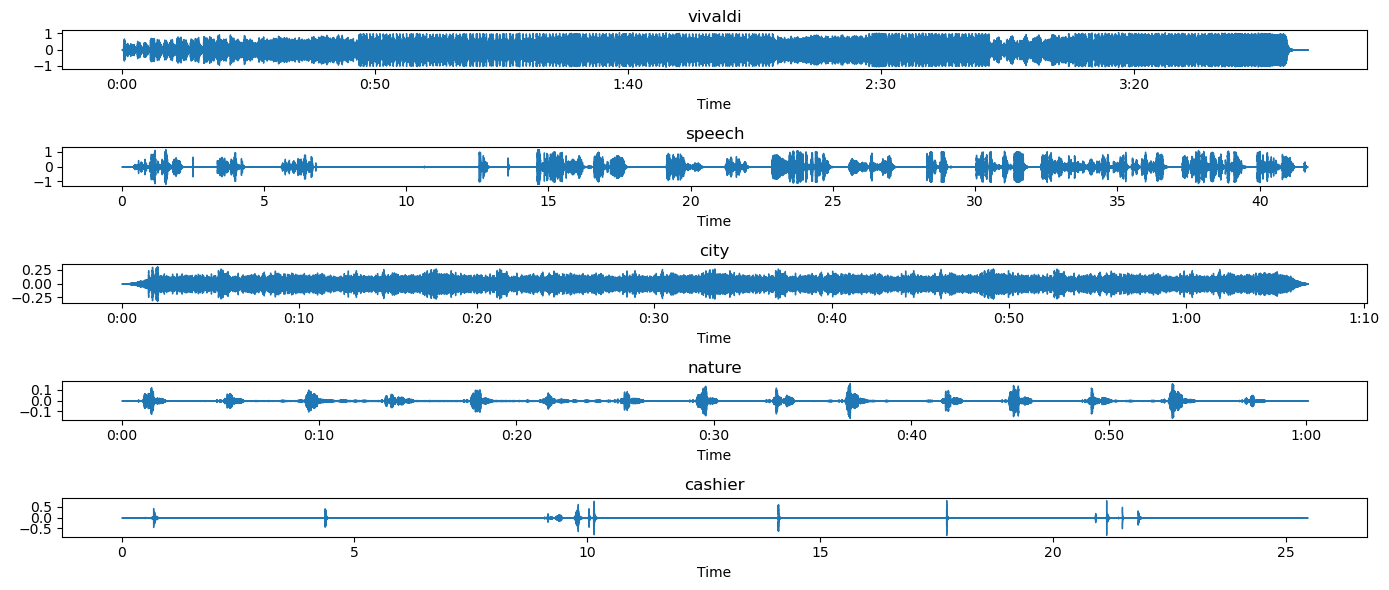

In [5]:
plt.figure(figsize=(14, 6))

for i, (name, (y, sr)) in enumerate(signals.items(), 1):
    plt.subplot(5, 1, i)
    librosa.display.waveshow(y, sr=sr)
    plt.title(name)

plt.tight_layout()
plt.show()

In [ ]:
for i, (name, (y, sr)) in enumerate(signals.items(), 1):
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    zcr = librosa.feature.zero_crossing_rate(y)

    rms = librosa.feature.rms(y=y)
    stats = {
    "Centroid_Mean": np.mean(cent),
    "Centroid_Std": np.std(cent),
    "ZCR_Mean": np.mean(zcr),
    "RMS_Mean": np.mean(rms)
}
    print("Статистические признаки:\n", stats)

In [4]:
def stat_features(y, sr):
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    return {
        "Centroid_Mean": np.mean(cent),
        "Centroid_Std": np.std(cent),
        "RMS_Mean": np.mean(rms),
        "min": np.min(y),
        "max": np.max(y),
        "ZCR_Mean": np.mean(zcr)
    }

stats = {name: stat_features(y, sr) for name, (y, sr) in signals.items()}

In [14]:
stats

{'music': {'Centroid_Mean': np.float64(2067.4738023741115),
  'Centroid_Std': np.float64(549.2952226510612),
  'RMS_Mean': np.float32(0.23566996),
  'min': np.float32(-1.0240003),
  'max': np.float32(1.0629029),
  'ZCR_Mean': np.float64(0.09741423907117368)},
 'speech': {'Centroid_Mean': np.float64(2449.30206731335),
  'Centroid_Std': np.float64(1285.6020434154927),
  'RMS_Mean': np.float32(0.08148125),
  'min': np.float32(-1.1617028),
  'max': np.float32(1.1766106),
  'ZCR_Mean': np.float64(0.12238595533477171)},
 'city': {'Centroid_Mean': np.float64(1573.542352813819),
  'Centroid_Std': np.float64(252.7294695643491),
  'RMS_Mean': np.float32(0.048708312),
  'min': np.float32(-0.31515187),
  'max': np.float32(0.29752594),
  'ZCR_Mean': np.float64(0.07605786353370396)},
 'nature': {'Centroid_Mean': np.float64(3102.2494596844904),
  'Centroid_Std': np.float64(998.3119179979227),
  'RMS_Mean': np.float32(0.005333872),
  'min': np.float32(-0.16196415),
  'max': np.float32(0.16014682),
  '

In [6]:
import pandas as pd

In [7]:
stats_df = pd.DataFrame(stats).T
stats_df

,Centroid_Mean,Centroid_Std,RMS_Mean,min,max,ZCR_Mean
music,2067.473802,549.295223,0.235670,-1.024000,1.062903,0.097414
speech,2449.302067,1285.602043,0.081481,-1.161703,1.176611,0.122386
city,1573.542353,252.729470,0.048708,-0.315152,0.297526,0.076058
nature,3102.249460,998.311918,0.005334,-0.161964,0.160147,0.229366
own,1720.481478,1683.110448,0.003510,-0.810673,0.773530,0.089549


## 1. Centroid_Mean — средний спектральный центроид

Что это:  
Спектральный центроид — это «центр тяжести» спектра.
- Низкие значения → звук глухой, низкочастотный  
- Высокие значения → звук яркий, с преобладанием высоких частот  

Интерпретация по классам:
- nature — самый высокий центроид → много высокочастотного шума (листва, птицы)
- speech — высокий → форманты речи
- music — средний → сбалансированный спектр
- city — низкий → гул, транспорт, фон
- own — ближе к city / music

Вывод:  
Хороший признак для разделения *природы*, *речи* и *города*.

## 2. Centroid_Std — стандартное отклонение спектрального центроида

Что это:  
Показывает, насколько частотная структура меняется со временем.

Интерпретация:
- Высокое значение → динамичный, изменчивый звук
- Низкое значение → монотонный, стабильный шум

По классам:
- own — самый нестабильный звук
- speech — высокая вариативность (естественно для речи)
- nature — умеренно вариативный
- music — более структурированная
- city — самый стабильный и монотонный

Вывод:  
Отлично отделяет *городской шум* от *речи* и *собственных записей*.

## 3. RMS_Mean — средняя энергия сигнала (громкость)

Что это:  
RMS (Root Mean Square) отражает энергетическую насыщенность сигнала.

Интерпретация:
- Высокое значение → громкий, плотный сигнал
- Низкое значение → тихий, разреженный

По классам:
- music — самая высокая энергия
- speech — средняя громкость
- city — ниже средней
- nature — очень тихий
- own — самый тихий

Вывод:  
Музыка резко выделяется по этому признаку.

## 4. min / max — минимальная и максимальная амплитуда

Что это:  
Экстремальные значения аудиосигнала.

Интерпретация:
- Широкий диапазон → резкие переходы, высокая динамика
- Узкий диапазон → ровный, фоновый звук

По классам:
- speech, music — почти полный диапазон [-1, 1]
- city, nature — сжатый диапазон
- own — асимметричные пики

Вывод:  
Речь и музыка — наиболее динамичные по амплитуде.

## 5. ZCR_Mean — Zero Crossing Rate

Что это:  
Частота пересечения сигналом нулевого уровня.
- Высокий ZCR → шум, шипение, высокие частоты
- Низкий ZCR → плавный, тональный сигнал

По классам:
- nature — самый высокий ZCR (шумовые компоненты)
- speech — типичное значение для речи
- music — умеренный
- own — ближе к музыкальному
- city — самый низкий (ровный гул)

Вывод:  
ZCR — сильный признак для отделения *природы* от *города* и *музыки*.

## Итоговая характеристика классов

### 🎵 Music
- Высокая RMS
- Средний спектральный центроид
- Умеренный ZCR  
→ плотный, структурированный сигнал

### 🗣 Speech
- Высокая спектральная вариативность
- Средний ZCR
- Широкий динамический диапазон  
→ информативный и динамичный сигнал

### 🏙 City
- Низкий центроид
- Минимальный разброс
- Низкий ZCR  
→ монотонный фоновый шум

### 🌿 Nature
- Самый высокий центроид
- Самый высокий ZCR
- Очень низкая RMS  
→ тихий, шумовой, высокочастотный сигнал

### 🎧 Own
- Максимальная нестабильность спектра
- Низкая энергия
- Средний ZCR  
→ неоднородный класс, сильно зависит от содержания записи

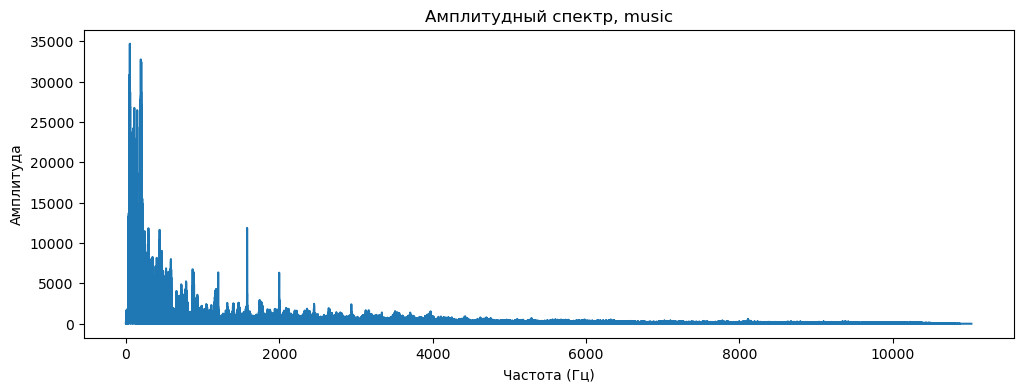

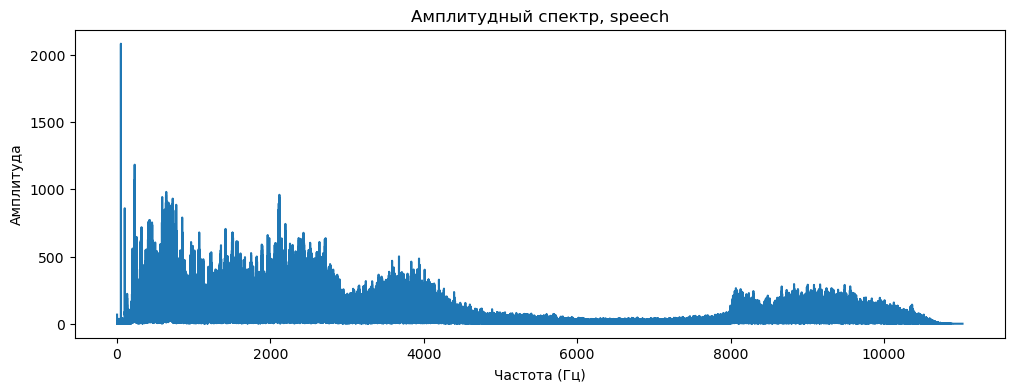

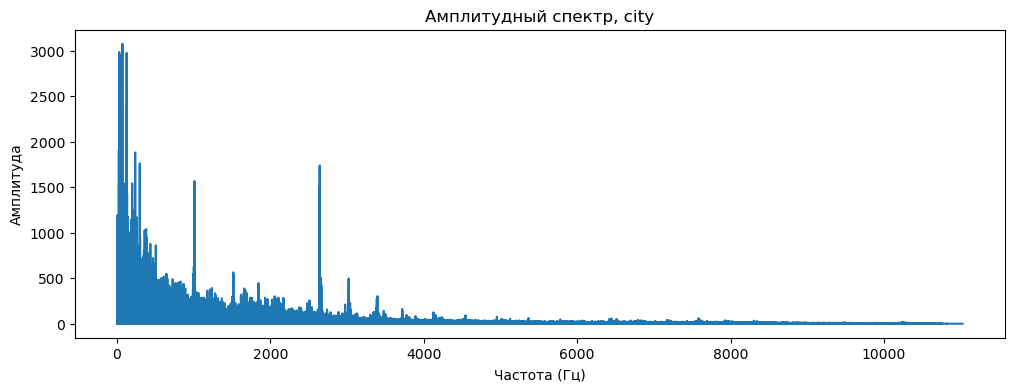

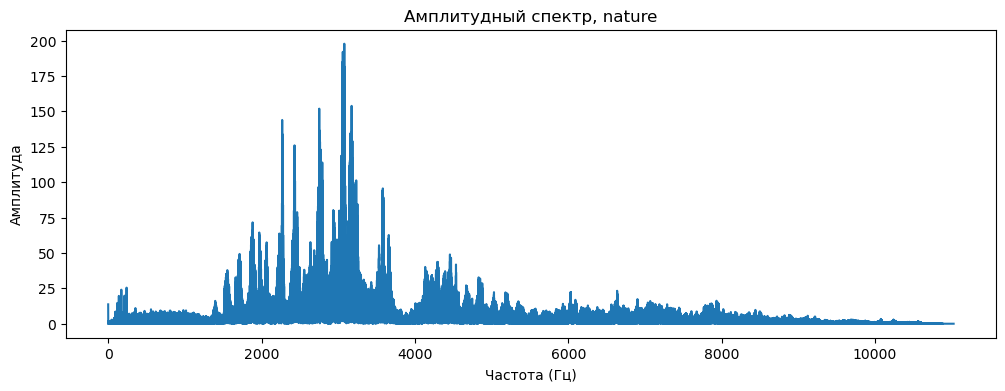

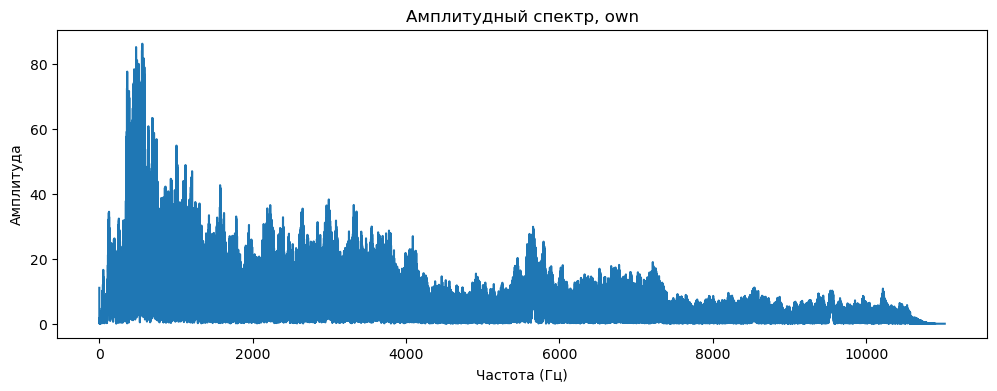

In [9]:
for i, (name, (y, sr)) in enumerate(signals.items(), 1):
    # FFT
    Y = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(y), 1/sr)

# Берём только положительные частоты
    idx = freqs >= 0

    plt.figure(figsize=(12, 4))
    plt.plot(freqs[idx], np.abs(Y[idx]))
    plt.title(f"Амплитудный спектр, {name}")
    plt.xlabel("Частота (Гц)")
    plt.ylabel("Амплитуда")
    plt.show()

In [16]:
def compute_stft(y):
    return librosa.stft(y, n_fft=2048, hop_length=512)

stfts = {name: compute_stft(y) for name, (y, _) in signals.items()}

In [12]:
signals

{'music': (array([ 2.7284841e-12, -8.1854523e-12, -1.8189894e-12, ...,
          4.1910919e-15,  3.4444669e-14,  6.9166894e-14],
        shape=(5164728,), dtype=float32),
  22050),
 'speech': (array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -3.3355733e-05, -2.7862439e-05, -3.3756027e-05],
        shape=(919044,), dtype=float32),
  22050),
 'city': (array([-5.9685590e-13, -6.8212103e-13, -9.6633812e-13, ...,
         -4.6343240e-04, -5.0715066e-04, -5.3474517e-04],
        shape=(1473408,), dtype=float32),
  22050),
 'nature': (array([-2.5740246e-07,  3.9958195e-07, -6.0166894e-07, ...,
          3.2086973e-08, -2.8640500e-08,  2.5076588e-08],
        shape=(1324647,), dtype=float32),
  22050),
 'own': (array([0., 0., 0., ..., 0., 0., 0.], shape=(561600,), dtype=float32),
  22050)}

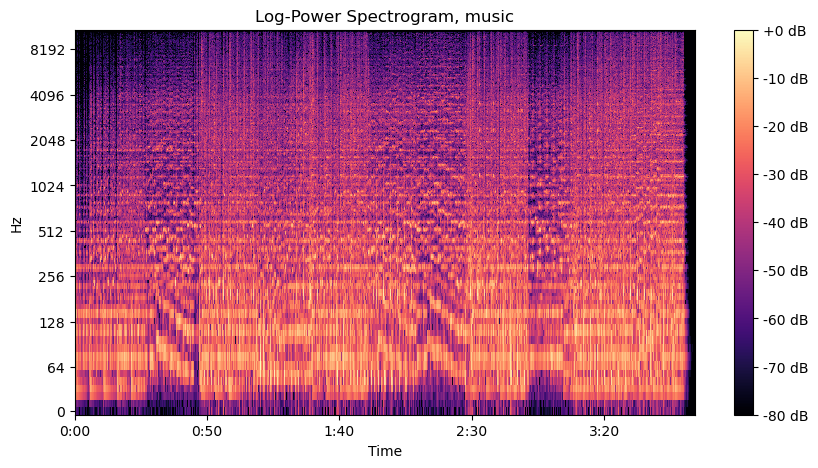

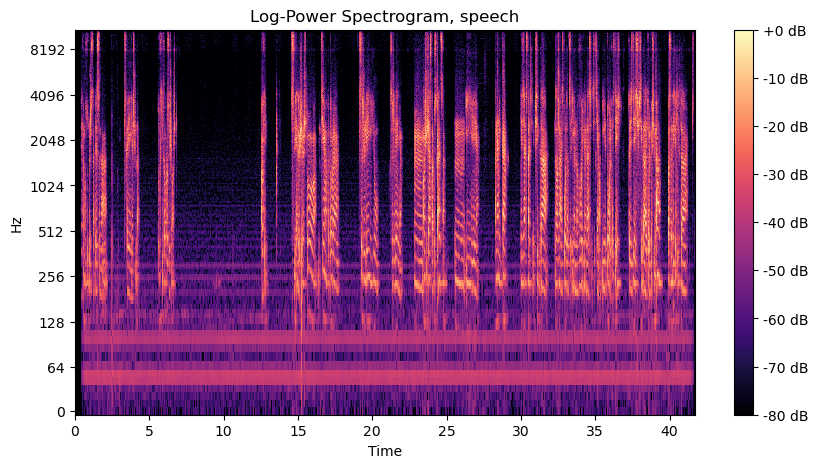

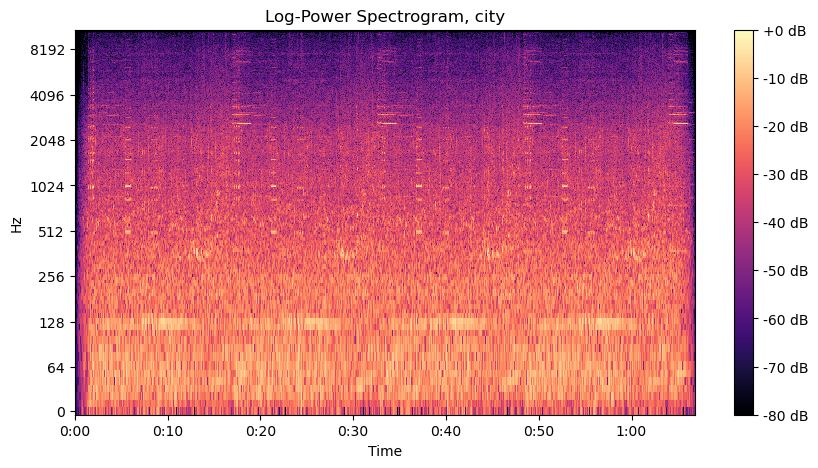

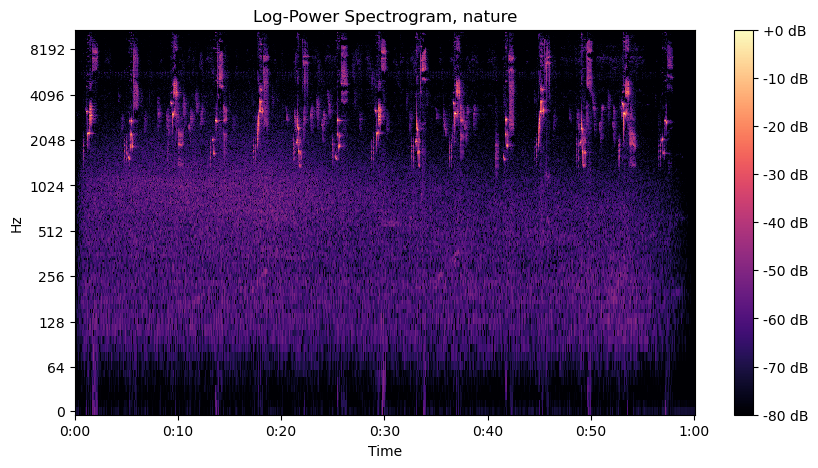

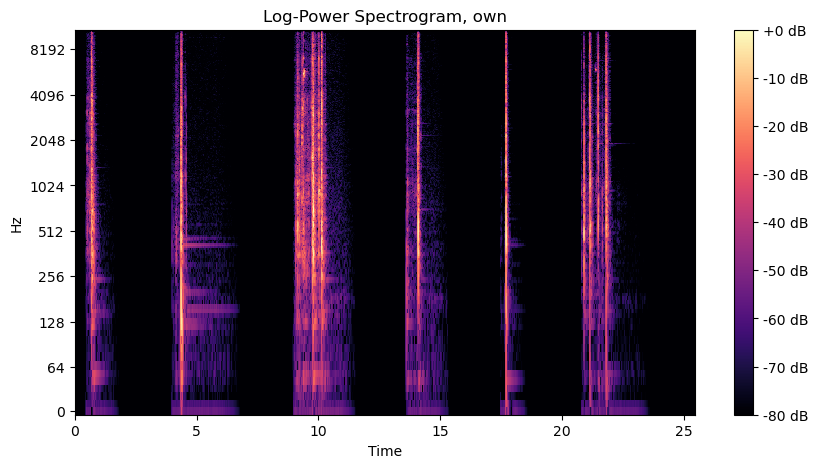

In [17]:
for i, (name, (y,sr)) in enumerate(signals.items(), 1):
    S_magnitude, _ = librosa.magphase(stfts.get(name))

    S_power = S_magnitude ** 2

    S_db = librosa.power_to_db(S_power, ref=np.max)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-Power Spectrogram, {name}')
    plt.show()